## Global Historical Climatology Network

The [Global Historical Climatology Network (GHCN)](http://www.ncdc.noaa.gov/data-access/land-based-station-data/land-based-datasets/global-historical-climatology-network-ghcn) provides access to integrated database of quality reviewed climate data. For these notebooks, we use the [GHCN to access historical records](http://www.ncdc.noaa.gov/) for precipitation at International Falls, MN, [Station KINL](http://forecast.weather.gov/MapClick.php?lat=48.58&lon=-93.38#.VHNxbZPF_Xg) in the NOAA network.

## Initialization

### Load Python Modules

In [1]:
# Display graphics inline with the notebook
%matplotlib inline

# Standard Python modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime

# Module to enhance matplotlib plotting
import seaborn
seaborn.set()

# Modules to display images and data tables
from IPython.display import Image
from IPython.core.display import display

# Styles
from IPython.core.display import HTML
HTML(open("styles/custom.css", "r").read())

In [2]:
# Directory where data files are stored
dir = "./data/"

## Read Precipitation Data Tables

In [3]:
# Read .csv file
KINL = pd.read_csv(dir + '434021.csv',index_col=2,parse_dates=True);

# Drop unneeded columns
KINL.drop('STATION',axis=1,inplace=True)
KINL.drop('STATION_NAME',axis=1,inplace=True)
KINL.ix[KINL['SNWD']==-9999,'SNWD'] = float('nan')
KINL.ix[KINL['SNOW']==-9999,'SNOW'] = float('nan')
KINL.ix[KINL['WESD']==-9999,'WESD'] = float('nan')

display(KINL.head())
display(KINL.tail())

,PRCP,SNWD,SNOW,WESD
DATE,,,,
1970-01-01,3,356,3,605
1970-01-02,0,356,0,607
1970-01-03,10,356,10,617
1970-01-04,3,356,3,620
1970-01-05,0,356,0,620


,PRCP,SNWD,SNOW,WESD
DATE,,,,
2014-11-16,5,50,18,NaN
2014-11-17,3,80,5,NaN
2014-11-18,5,80,18,NaN
2014-11-19,18,100,51,NaN
2014-11-20,0,130,3,NaN


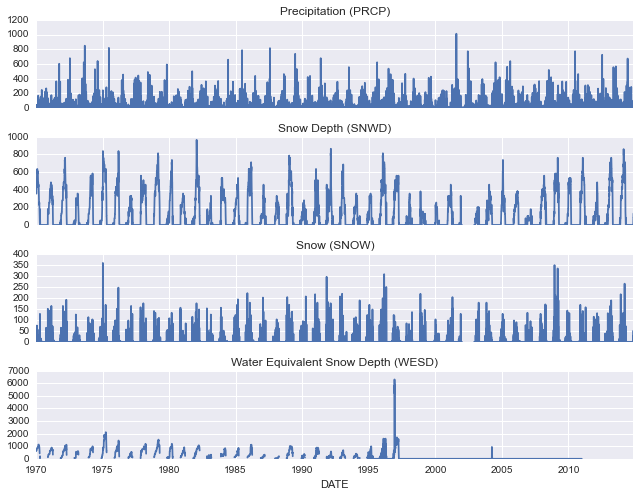

In [4]:
plt.figure(figsize=(9,7))

plt.subplot(4,1,1)
KINL['PRCP'].plot()
plt.title('Precipitation (PRCP)')

plt.subplot(4,1,2)
KINL['SNWD'].plot()
plt.title('Snow Depth (SNWD)')

plt.subplot(4,1,3)
KINL['SNOW'].plot()
plt.title('Snow (SNOW)')

plt.subplot(4,1,4)
KINL['WESD'].plot()
plt.title('Water Equivalent Snow Depth (WESD)')

plt.tight_layout()

## Pickle KINL Precipitation

The data series for water equivalent snow depth appears to be incomplete and not useful the present analysis. The data series for precipitation is converted to a Pandas data series and to standard metric units for precipitation, mm of water. The data series is pickled to a file `PRCP.pkl`.

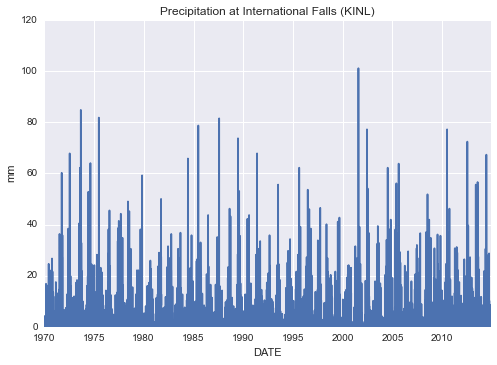

In [5]:
dir = './data/'

KINL = pd.Series(KINL['PRCP'])/10.0
KINL.name = 'Precipitation at International Falls (KINL)'
KINL.to_pickle(dir+'KINL.pkl')

KINL.plot()
plt.title(KINL.name)
plt.ylabel('mm')

## Temperature Data Set for International Falls, MN (KINL)

In [6]:
# Read .csv file
TEMP = pd.read_csv(dir + '528052.csv',index_col=2,parse_dates=True);

# Drop unneeded columns
TEMP.drop('STATION',axis=1,inplace=True)
TEMP.drop('STATION_NAME',axis=1,inplace=True)
TEMP.drop('TOBS',axis=1,inplace=True)

TEMP.ix[TEMP['TMAX']==-9999,'TMAX'] = float('nan')
TEMP.ix[TEMP['TMIN']==-9999,'TMIN'] = float('nan')

# Convert to Celcius
TEMP = TEMP/10.0   # 32.0 + (9.0*TEMP/50.0)

,Tmax 1948-1981,Tmin 1948-1981
DATE,,
1948-01-01,-8.9,-30.0
1948-01-02,-5.6,-12.2
1948-01-03,-5.0,-10.6
1948-01-04,-4.4,-8.3
1948-01-05,-0.6,-10.0


,Tmax 1982-2014,Tmin 1982-2014
DATE,,
1982-01-01,-21.7,-31.1
1982-01-02,-8.3,-22.2
1982-01-03,-12.2,-28.9
1982-01-04,-18.3,-26.7
1982-01-05,-10.0,-26.1


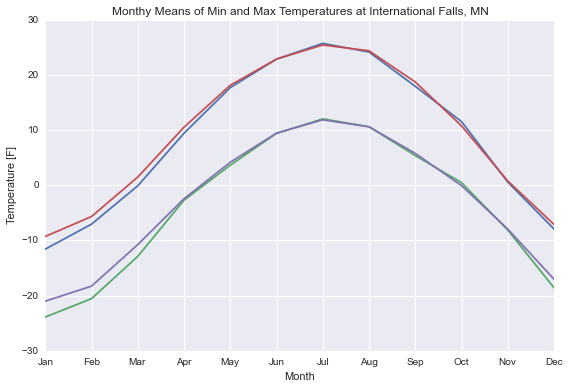

In [7]:
# Create Comparison Sets
Ta = TEMP['1948':'1981']
Ta.columns = ['Tmax 1948-1981', 'Tmin 1948-1981']
display(Ta.head())

Tb = TEMP['1982':'2014']
Tb.columns = ['Tmax 1982-2014', 'Tmin 1982-2014']
display(Tb.head())

# Group by month, plot on same axis
ax = Ta['Tmax 1948-1981'].groupby(Ta.index.month).mean().plot()
plt.hold(True)
Ta['Tmin 1948-1981'].groupby(Ta.index.month).mean().plot(ax=ax)
Tb['Tmax 1982-2014'].groupby(Tb.index.month).mean().plot(ax=ax)
Tb['Tmin 1982-2014'].groupby(Tb.index.month).mean().plot(ax=ax)
plt.hold(False)

ax.set_xticks(np.arange(1.0,13.0,1.0))
ax.set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun',
                    'Jul','Aug','Sep','Oct','Nov','Dec'));

plt.title('Monthy Means of Min and Max Temperatures at International Falls, MN')
plt.ylabel('Temperature [C]');
plt.xlabel('Month')

plt.tight_layout()
fname = './images/KINL_MonthyMeanTemp.png'
plt.savefig(fname)
!convert $fname -trim $fname

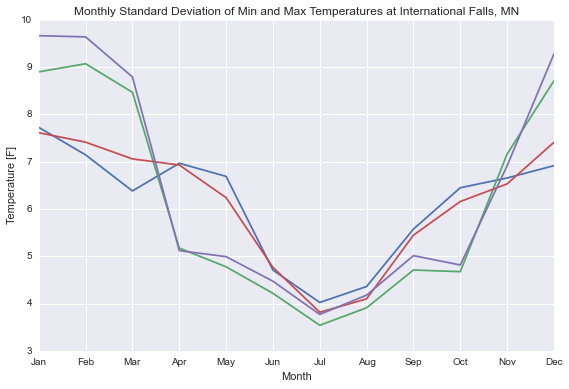

In [12]:
# Group by month, plot on same axis
ax = Ta['Tmax 1948-1981'].groupby(Ta.index.month).std().plot()
plt.hold(True)
Ta['Tmin 1948-1981'].groupby(Ta.index.month).std().plot(ax=ax)
Tb['Tmax 1982-2014'].groupby(Tb.index.month).std().plot(ax=ax)
Tb['Tmin 1982-2014'].groupby(Tb.index.month).std().plot(ax=ax)
plt.hold(False)

ax.set_xticks(np.arange(1.0,13.0,1.0))
ax.set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun',
                    'Jul','Aug','Sep','Oct','Nov','Dec'));

plt.title('Monthly Standard Deviation of Min and Max Temperatures at International Falls, MN')
plt.ylabel('Temperature [C]');
plt.xlabel('Month')

plt.tight_layout()
fname = './images/KINL_MonthyStdTemp.png'
plt.savefig(fname)
!convert $fname -trim $fname

### Cumulative Temperature Distributions, 1948-1981 versus 1981-2014

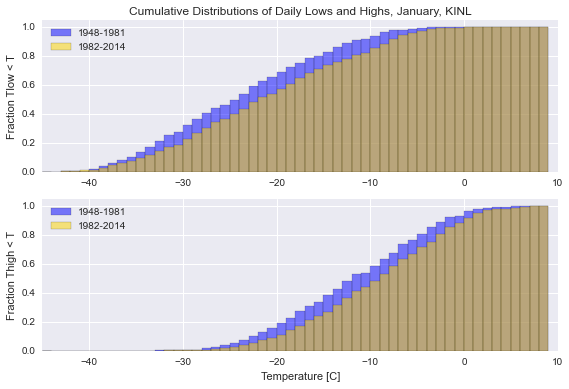

In [19]:
b = np.arange(-45,10,1)

plt.subplot(2,1,1)

Ta['Tmin 1948-1981'][Ta.index.month == 1].hist(
    cumulative=True,bins=b,color='blue',normed=1,alpha=0.5)
plt.hold(True)
Tb['Tmin 1982-2014'][Tb.index.month == 1].hist(
    cumulative=True,bins=b,color='gold',normed=1,alpha=0.5)
plt.hold(False)
plt.legend(['1948-1981','1982-2014'],loc='best')

plt.axis([-45,10,0,1.05])

plt.title('Cumulative Distributions of Daily Lows and Highs, January, KINL')
plt.ylabel('Fraction Tlow < T')

plt.subplot(2,1,2)

Ta['Tmax 1948-1981'][Ta.index.month == 1].hist(
    cumulative=True,bins=b,color='blue',normed=1,alpha=0.5)
plt.hold(True)
Tb['Tmax 1982-2014'][Tb.index.month == 1].hist(
    cumulative=True,bins=b,color='gold',normed=1,alpha=0.5)
plt.hold(False)
plt.legend(['1948-1981','1982-2014'],loc='best')

plt.axis([-45,10,0,1.05])

plt.xlabel('Temperature [C]')
plt.ylabel('Fraction Thigh < T')

plt.tight_layout()
fname = './images/KINL_TempJan.png'
plt.savefig(fname)
!convert $fname -trim $fname

### Distribution of Daily Lows by Month

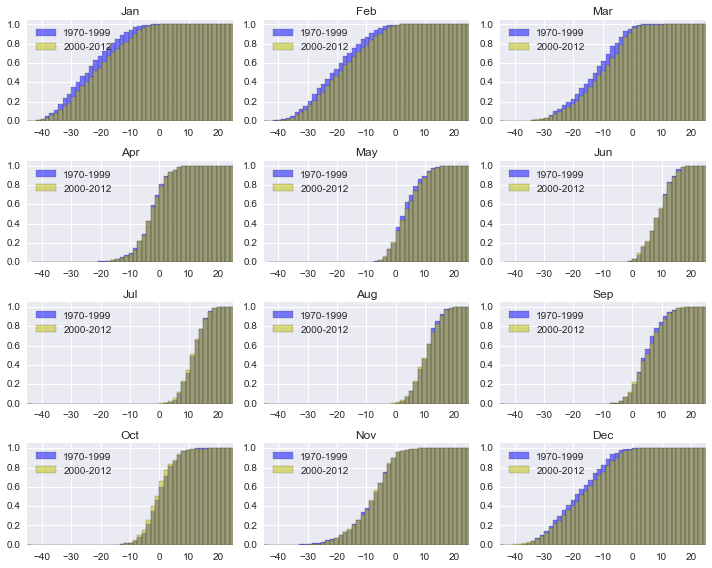

In [22]:
mostr = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
xlo = -45
xhi = 25
dx = 0.5
plt.figure(figsize=(10,8))
for mo in range(1,13):
    plt.subplot(4,3,mo)
    plt.hold(True)
    Ta['Tmin 1948-1981'][Ta.index.month == mo].hist(cumulative=True,
                                    normed=True,
                                    bins=np.arange(xlo,xhi+3*dx,3*dx),
                                    color = 'b',
                                    alpha = 0.5)
    Tb['Tmin 1982-2014'][Tb.index.month == mo].hist(cumulative=True,
                                    normed=True,
                                    bins=np.arange(xlo,xhi+3*dx,3*dx),
                                    color = 'y',
                                    alpha = 0.5)
    plt.legend(['1970-1999','2000-2012'],loc='upper left')
    plt.axis([xlo,xhi,0,1.05])
    plt.title(mostr[mo-1])
    plt.hold(False)
    
plt.tight_layout()
fname = './images/KINL_Lows.png'
plt.savefig(fname)
!convert $fname -trim $fname

### Distribution of Daily HIghs by Month

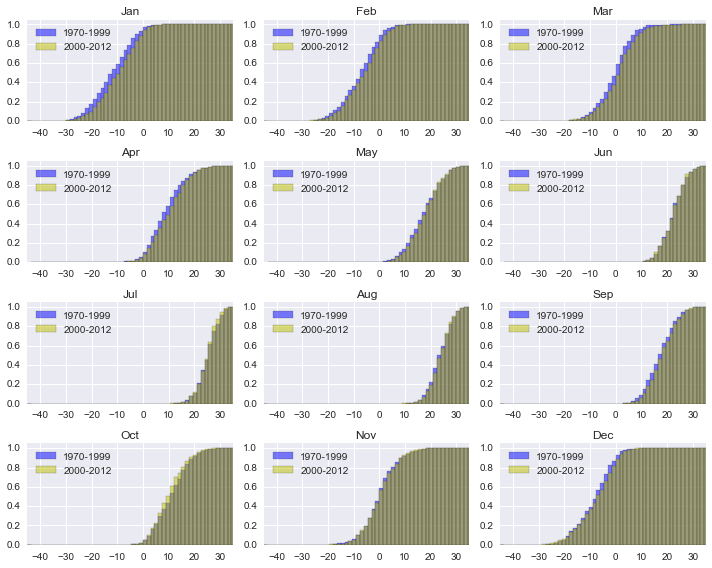

In [24]:
mostr = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
xlo = -45
xhi = 35
dx = 0.5
plt.figure(figsize=(10,8))
for mo in range(1,13):
    plt.subplot(4,3,mo)
    plt.hold(True)
    Ta['Tmax 1948-1981'][Ta.index.month == mo].hist(cumulative=True,
                                    normed=True,
                                    bins=np.arange(xlo,xhi+3*dx,3*dx),
                                    color = 'b',
                                    alpha = 0.5)
    Tb['Tmax 1982-2014'][Tb.index.month == mo].hist(cumulative=True,
                                    normed=True,
                                    bins=np.arange(xlo,xhi+3*dx,3*dx),
                                    color = 'y',
                                    alpha = 0.5)
    plt.legend(['1970-1999','2000-2012'],loc='upper left')
    plt.axis([xlo,xhi,0,1.05])
    plt.title(mostr[mo-1])
    plt.hold(False)
    
plt.tight_layout()
fname = './images/KINL_Highs.png'
plt.savefig(fname)
!convert $fname -trim $fname